In [1]:
import numpy as np
import pandas as pd
from hftbacktest import BacktestAsset, HashMapMarketDepthBacktest
from hftbacktest import Recorder
from hftbacktest.stats import LinearAssetRecord
import matplotlib.pyplot as plt
from src.strategies.glft_pretrained_rf import glft_pre_trained
from src.strategies.glft import gridtrading_glft_mm

y = np.load("../data/features/directional_labels/k_50_deeplob_cat_labels_02_jan.npy")
features = np.load("../data/features/normalized_features/normalized_02_jan.npy")
stats = pd.read_csv("../data-generated/daily_stats_25_merged.csv").to_numpy()

In [2]:
day_start = 3
day_end = 4
n_trading_days = day_end - day_start

data_paths = []

for i in range(day_start, day_end):
    day_file = f"../data/daily_processed/deribit_eth_perp_2025-01-{i:02d}.npz"
    data_paths.append(day_file)

eod = np.load(f"../data/snapshots/deribit_eth_perp_2025-01-{(day_start - 1):02d}_eod.npz")['data']

In [3]:
MAKER_FEE = -0.0001 
TAKER_FEE =  0.0005  

TICK_SIZE = 0.01
LOT_SIZE = 1

gamma = 0.01143319447439636
delta = 1
adj1 = 0.9314120055506834
adj2 = 0.43081606500331926
max_position=50

In [4]:
# # TREE
# asset = (
# BacktestAsset()
#     .data(data_paths)
#     .initial_snapshot(eod)
#     .linear_asset(1.0)
#     .constant_latency(10000, 10000)
#     .risk_adverse_queue_model()
#     .no_partial_fill_exchange()
#     .trading_value_fee_model(MAKER_FEE, TAKER_FEE)
#     .tick_size(TICK_SIZE)
#     .lot_size(LOT_SIZE)
#     .last_trades_capacity(10000)
# )
# 
# hbt = HashMapMarketDepthBacktest([asset])
# recorder = Recorder(1, n_trading_days* 1_000_000)
# 
# glft_pre_trained(hbt, recorder.recorder, n_trading_days, gamma, delta, adj1, adj2, max_position, stats, features, y)
# hbt.close()

Hour: 0
Hour: 1
Hour: 2
Hour: 3
Hour: 4
Hour: 5
Hour: 6
Hour: 7
Hour: 8
Hour: 9
Hour: 10
Hour: 11
Hour: 12
Hour: 13
Hour: 14
Hour: 15
Hour: 16
Hour: 17
Hour: 18
Hour: 19
Hour: 20
Hour: 21
Hour: 22
Hour: 23


0

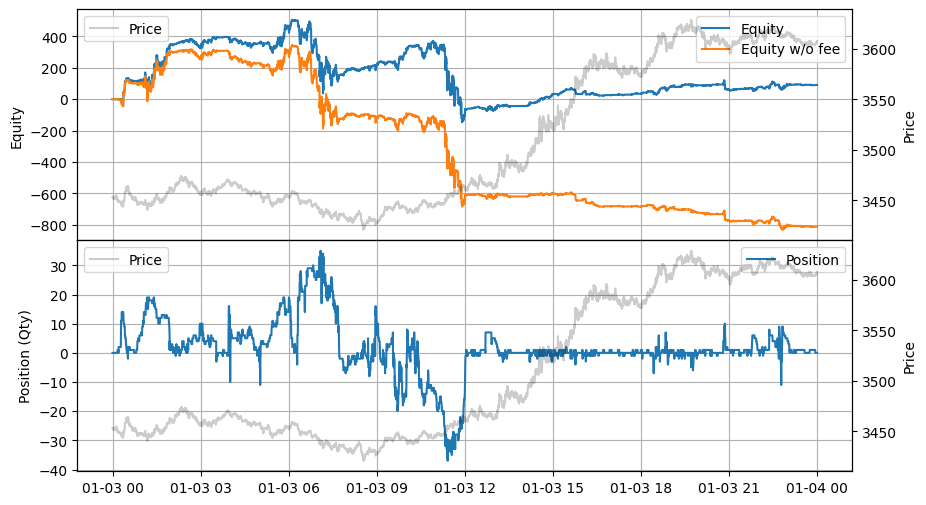

shape: (1, 11)
┌────────────┬───────────┬──────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ start      ┆ end       ┆ SR       ┆ Sortino  ┆ … ┆ DailyTrad ┆ ReturnOve ┆ ReturnOve ┆ MaxPositi │
│ ---        ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ingValue  ┆ rMDD      ┆ rTrade    ┆ onValue   │
│ datetime[μ ┆ datetime[ ┆ f64      ┆ f64      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ s]         ┆ μs]       ┆          ┆          ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪═══════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2025-01-03 ┆ 2025-01-0 ┆ 2.753941 ┆ 3.791476 ┆ … ┆ 9.0322e6  ┆ 0.138507  ┆ 0.00001   ┆ 127858.12 │
│ 00:00:00   ┆ 3         ┆          ┆          ┆   ┆           ┆           ┆           ┆ 5         │
│            ┆ 23:59:50  ┆          ┆          ┆   ┆           ┆           ┆           ┆           │
└────────────┴───────────┴──────────┴──────────┴───┴───────────┴───────────┴

<Figure size 640x480 with 0 Axes>

In [5]:
# stats = LinearAssetRecord(recorder.get(0)).stats()
# 
# stats.plot()
# plt.savefig("../results/glft/tree_03.png")
# 
# df = stats.summary()
# df.write_csv("../results/glft/metrics_tree_03.csv", include_header=True)
# print(stats.summary(pretty=True))
# 
# # np.save("../results/glft/execution_times.npy", execution_times)

In [8]:
# print(stats.summary()['Return'])

shape: (1,)
Series: 'Return' [f64]
[
	74.079624
]


In [6]:
# GLFT 
asset = (
BacktestAsset()
    .data(data_paths)
    .initial_snapshot(eod)
    .linear_asset(1.0)
    .constant_latency(10000, 10000)
    .risk_adverse_queue_model()
    .no_partial_fill_exchange()
    .trading_value_fee_model(MAKER_FEE, TAKER_FEE)
    .tick_size(TICK_SIZE)
    .lot_size(LOT_SIZE)
    .last_trades_capacity(10000)
)

hbt = HashMapMarketDepthBacktest([asset])
recorder = Recorder(1, n_trading_days* 1_000_000)

execution_times = gridtrading_glft_mm(hbt, recorder.recorder, n_trading_days, gamma, delta, adj1, adj2, max_position)
hbt.close()

Trading day:  0


0

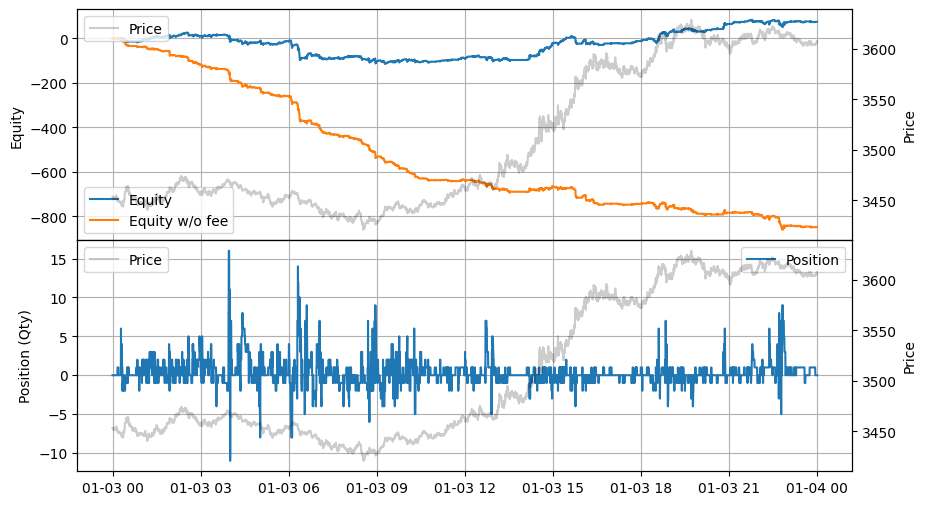

shape: (1, 11)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ start     ┆ end       ┆ SR        ┆ Sortino  ┆ … ┆ DailyTrad ┆ ReturnOve ┆ ReturnOve ┆ MaxPositi │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ingValue  ┆ rMDD      ┆ rTrade    ┆ onValue   │
│ datetime[ ┆ datetime[ ┆ f64       ┆ f64      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ μs]       ┆ μs]       ┆           ┆          ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2025-01-0 ┆ 2025-01-0 ┆ 11.093346 ┆ 14.60941 ┆ … ┆ 9.2163e6  ┆ 0.525779  ┆ 0.000008  ┆ 55490.8   │
│ 3         ┆ 3         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 00:00:00  ┆ 23:59:50  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
└───────────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴

<Figure size 640x480 with 0 Axes>

In [7]:
stats = LinearAssetRecord(recorder.get(0)).stats()

stats.plot()
plt.savefig("../results/glft/glft_03.png")

df = stats.summary()
df.write_csv("../results/glft/metrics_03_glft.csv", include_header=True)
print(stats.summary(pretty=True))

# np.save("../results/glft/execution_times.npy", execution_times)